# Syneval results

In [198]:
%matplotlib inline

import sys
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

In [210]:
UNK = '<UNK>'

ALL = [
    'simple_agrmt',
    'sent_comp',
    'vp_coord',
    'long_vp_coord',
    'prep_anim',
    'prep_inanim',
    'subj_rel',
    'obj_rel_across_anim',
    'obj_rel_across_inanim',
    'obj_rel_no_comp_across_anim',
    'obj_rel_no_comp_across_inanim',
    'obj_rel_no_comp_within_anim',
    'obj_rel_no_comp_within_inanim',
    'obj_rel_within_anim',
    'obj_rel_within_inanim',

    'simple_reflexives',
    'reflexive_sent_comp',
    'reflexives_across',

    'simple_npi_anim',
    'simple_npi_anim_the',
    'simple_npi_inanim',
    'simple_npi_inanim_the',
    'npi_across_anim',
    'npi_across_anim_the',
    'npi_across_inanim',
    'npi_across_inanim_the',
]


In [211]:
# Collapse certain classes into one to be consistent 
# with the classes reported in the syneval paper.

collapse_dict = {
    'simple_agrmt': 'simple_agrmt', 
    'sent_comp': 'sent_comp',
    'vp_coord': 'vp_coord',
    'long_vp_coord': 'long_vp_coord',
    'prep_anim': 'prep',
    'prep_inanim': 'prep',
    'subj_rel': 'subj_rel',
    'obj_rel_across_anim': 'obj_rel_across',
    'obj_rel_across_inanim': 'obj_rel_across',
    'obj_rel_no_comp_across_anim': 'obj_rel_no_comp_across',
    'obj_rel_no_comp_across_inanim': 'obj_rel_no_comp_across',
    'obj_rel_no_comp_within_anim': 'obj_rel_no_comp_within',
    'obj_rel_no_comp_within_inanim': 'obj_rel_no_comp_within',
    'obj_rel_within_anim': 'obj_rel_within',
    'obj_rel_within_inanim': 'obj_rel_within',

    'simple_reflexives': 'simple_reflexives',
    'reflexive_sent_comp': 'reflexive_sent_comp',
    'reflexives_across': 'reflexives_across',

    'simple_npi_anim': 'simple_npi',
    'simple_npi_anim_the': 'simple_npi_the',
    'simple_npi_inanim': 'simple_npi',
    'simple_npi_inanim_the': 'simple_npi_the',
    'npi_across_anim': 'npi_across',
    'npi_across_anim_the': 'npi_across_the',
    'npi_across_inanim': 'npi_across',
    'npi_across_inanim_the': 'npi_across_the',
}

ALL_COLLAPSE = [
    'simple_agrmt', 
    'sent_comp',
    'vp_coord',
    'long_vp_coord',
    'prep',
    'subj_rel',
    'obj_rel_across',
    'obj_rel_no_comp_across',
    'obj_rel_within',
    'obj_rel_no_comp_within',
    'simple_reflexives',
    'reflexive_sent_comp',
    'reflexives_across',
    'simple_npi',
    'simple_npi_the',
    'npi_across',
    'npi_across_the',
]


NAMES = {
    'agreement': [
        "Simple",
        "In a sentential complement",
        "Short VP coordination",
        "Long VP coordination",
        "Across a prepositional phrase",
        "Across a subject relative clause",
        "Across an object relative clause",
        "Across an object relative (no that)",
        "In an object relative clause",
        "In an object relative (no that)",
    ],

    'reflexives': [ 
        "Simple",
        "In a sentential complement",
        "Across a relative clause",
    ],

    'npi': [
        "Simple",
        "Simple (the)",
        "Across a relative clause",
        "Across a relative clause (the)",
    ]
}

In [212]:
def select(df, name):
    return df[df['name'] == name]


def accuracy(df, name, exclude_unks=False):
    if exclude_unks:
        pos_unk = df['pos-sentence-processed'].str.contains(UNK)
        neg_unk = df['neg-sentence-processed'].str.contains(UNK)
        df = df[-pos_unk & -neg_unk]

    field = select(df, name)['correct']
    return field.sum() / len(field)


def get_results_as_dict(df, exclude_unks=False):
    results = dict()
    for name in set(df['name']):
        results[name] = round(accuracy(df, name, exclude_unks), 2)
    results['total'] = round(df['correct'].sum() / len(df), 2)
    return results


# def get_results_as_dataframe(dfs, model_type='', exclude_unks=False):
#     assert isinstance(dfs, list)
#     assert all(isinstance(df, pd.DataFrame) for df in dfs)

#     names = set(dfs[0]['name'])
#     columns = ['name', 'accuracy', 'model', 'run'] 
    
#     results = []
#     for name in names:
#         for i, df in enumerate(dfs):
#             acc = round(accuracy(df, name, exclude_unks), 2)
#             results.append(
#                 [name, acc, model_type, i])

#     return pd.DataFrame(results, columns=columns)


def rename_classes(df, rename_dict):
    for old_name, new_name in rename_dict.items():
        df = df.replace(old_name, new_name)
    return df

def get_results_as_dataframe(dfs, model_type='', exclude_unks=False):
    assert isinstance(dfs, list)
    assert all(isinstance(df, pd.DataFrame) for df in dfs)

    names = set(dfs[0]['name'])
    columns = ['name', 'accuracy', 'model', 'run'] 
    
    results = []
    for name in names:
        for i, df in enumerate(dfs):
            acc = round(accuracy(df, name, exclude_unks), 2)
            results.append(
                [name, acc, model_type, i])

    return pd.DataFrame(results, columns=columns)

In [213]:
lm_dfs = [
    pd.read_csv(f'../models/{folder}/output/syneval_results.tsv', sep='\t') 
    for folder in lm_folders
]

In [214]:
collapsed_lm_dfs = [rename_classes(df, collapse_dict) for df in lm_dfs]

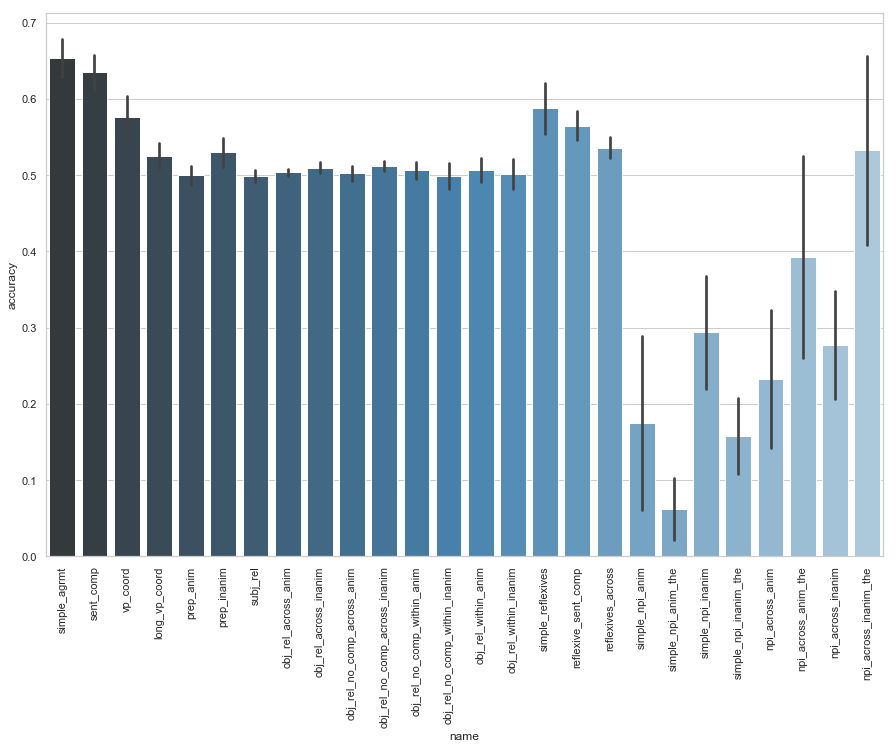

In [215]:
lm_df = get_results_as_dataframe(lm_dfs, 'lm')

fig, ax = plt.subplots(figsize=(15, 10))
g = sns.barplot(
    data=lm_df, x='name', y='accuracy', ax=ax, palette="Blues_d", order=ALL, ci='sd')
labels = plt.xticks(rotation=90)

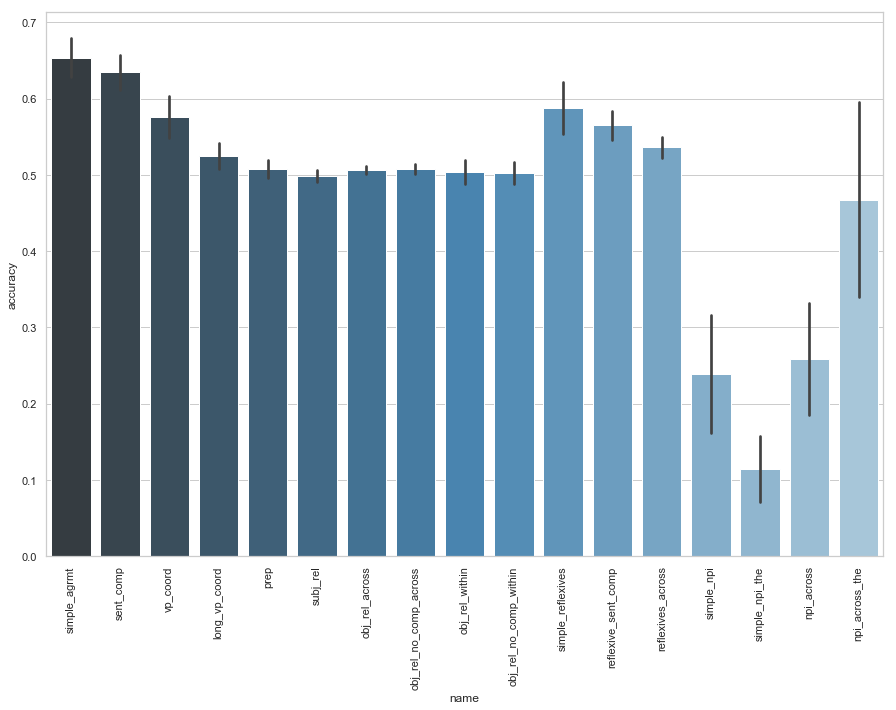

In [216]:
collapsed_lm_df = get_results_as_dataframe(collapsed_lm_dfs, 'lm')

fig, ax = plt.subplots(figsize=(15, 10))
g = sns.barplot(
    data=collapsed_lm_df, x='name', y='accuracy', ax=ax, palette="Blues_d", order=ALL_COLLAPSE, ci='sd')
labels = plt.xticks(rotation=90)

In [217]:
fpath ='../models/lm_dev=120.75/output/syneval_results.tsv'
lm_df = pd.read_csv(fpath, sep='\t')
lm_df['model'] = 'lm'

fpath ='../models/multitask-lm_seed=4_dev=136.3/output/syneval_results.tsv'
multi_df = pd.read_csv(fpath, sep='\t')
multi_df['model'] = 'multitask-lm'

In [218]:
get_results_as_dict(lm_df)

{'long_vp_coord': 0.52,
 'npi_across_anim': 0.4,
 'npi_across_anim_the': 0.17,
 'npi_across_inanim': 0.29,
 'npi_across_inanim_the': 0.34,
 'obj_rel_across_anim': 0.5,
 'obj_rel_across_inanim': 0.52,
 'obj_rel_no_comp_across_anim': 0.5,
 'obj_rel_no_comp_across_inanim': 0.52,
 'obj_rel_no_comp_within_anim': 0.52,
 'obj_rel_no_comp_within_inanim': 0.51,
 'obj_rel_within_anim': 0.53,
 'obj_rel_within_inanim': 0.52,
 'prep_anim': 0.5,
 'prep_inanim': 0.55,
 'reflexive_sent_comp': 0.57,
 'reflexives_across': 0.54,
 'sent_comp': 0.63,
 'simple_agrmt': 0.68,
 'simple_npi_anim': 0.29,
 'simple_npi_anim_the': 0.02,
 'simple_npi_inanim': 0.3,
 'simple_npi_inanim_the': 0.08,
 'simple_reflexives': 0.59,
 'subj_rel': 0.5,
 'total': 0.49,
 'vp_coord': 0.62}

In [219]:
get_results_as_dict(multi_df)

{'long_vp_coord': 0.61,
 'npi_across_anim': 0.0,
 'npi_across_anim_the': 0.55,
 'npi_across_inanim': 0.0,
 'npi_across_inanim_the': 0.71,
 'obj_rel_across_anim': 0.59,
 'obj_rel_across_inanim': 0.55,
 'obj_rel_no_comp_across_anim': 0.59,
 'obj_rel_no_comp_across_inanim': 0.55,
 'obj_rel_no_comp_within_anim': 0.65,
 'obj_rel_no_comp_within_inanim': 0.67,
 'obj_rel_within_anim': 0.71,
 'obj_rel_within_inanim': 0.69,
 'prep_anim': 0.6,
 'prep_inanim': 0.57,
 'reflexive_sent_comp': 0.7,
 'reflexives_across': 0.62,
 'sent_comp': 0.73,
 'simple_agrmt': 0.76,
 'simple_npi_anim': 0.07,
 'simple_npi_anim_the': 0.33,
 'simple_npi_inanim': 0.08,
 'simple_npi_inanim_the': 0.36,
 'simple_reflexives': 0.74,
 'subj_rel': 0.57,
 'total': 0.58,
 'vp_coord': 0.72}

# Violin plots

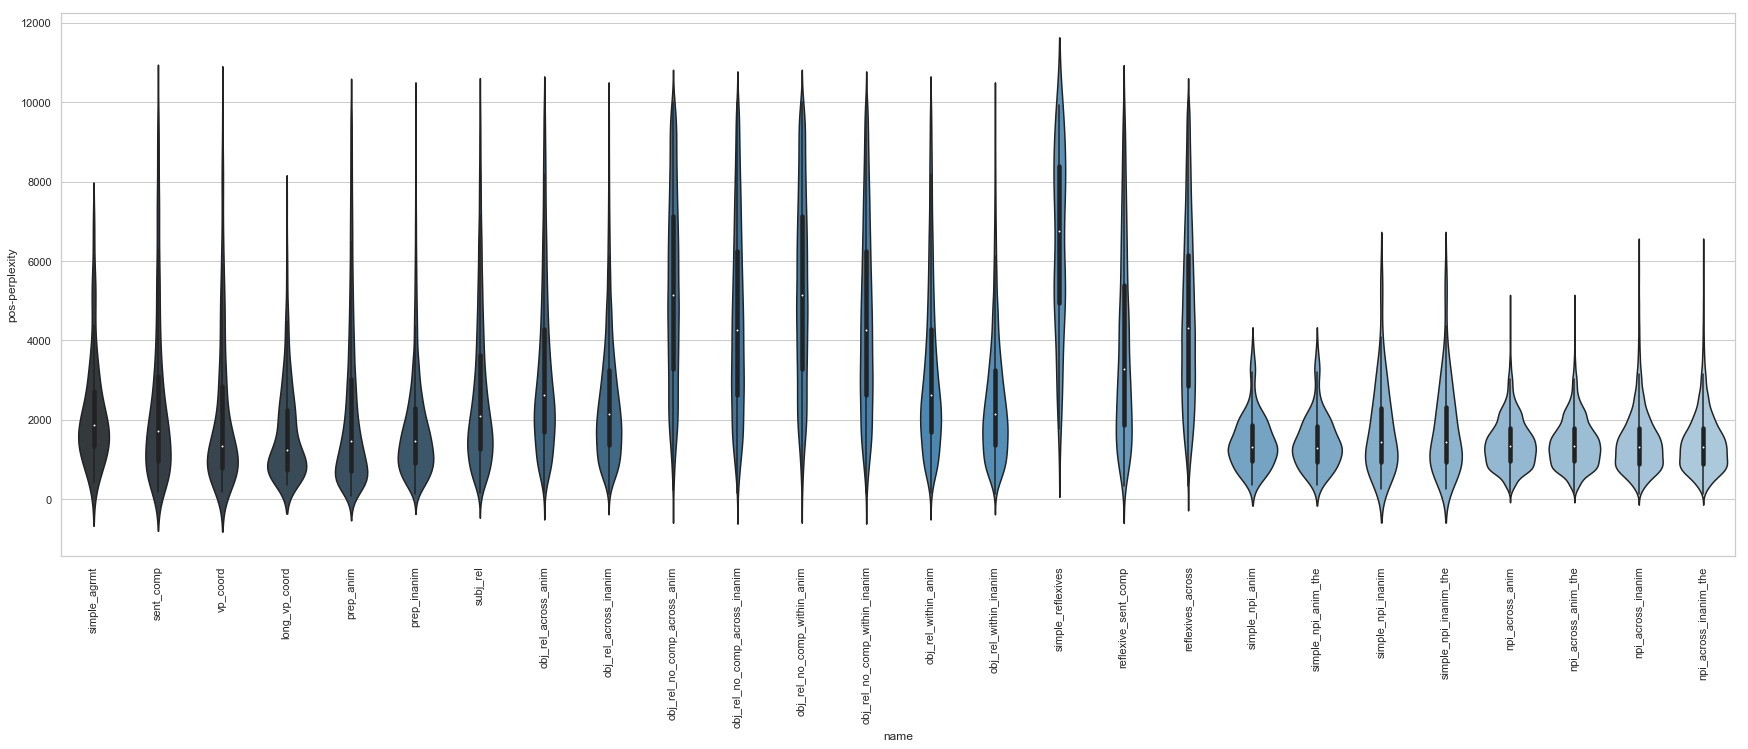

In [220]:
fig, ax = plt.subplots(figsize=(30, 10))

multi_df_clip = multi_df[multi_df['pos-perplexity'] < 10000]
sns.violinplot(
    data=multi_df_clip, x='name', y='pos-perplexity', ax=ax, palette='Blues_d', order=ALL)
_ = plt.xticks(rotation=90)

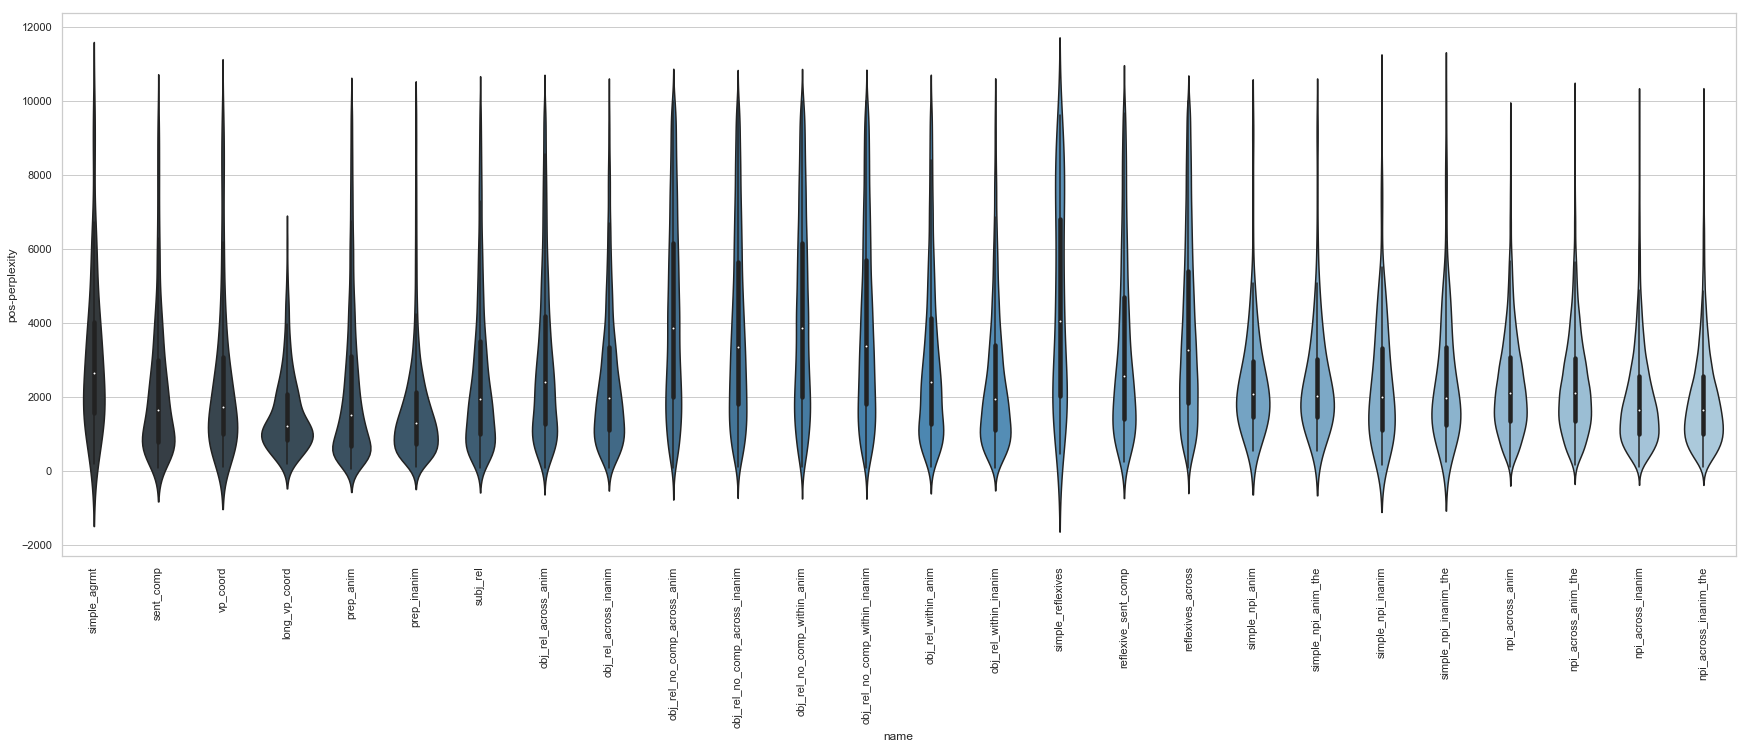

In [221]:
lm_df_clip = lm_df[lm_df['pos-perplexity'] < 10000]

fig, ax = plt.subplots(figsize=(30, 10))
f = sns.violinplot(
    data=lm_df_clip, x='name', y='pos-perplexity', ax=ax, palette='Blues_d', order=ALL)
_ = plt.xticks(rotation=90)

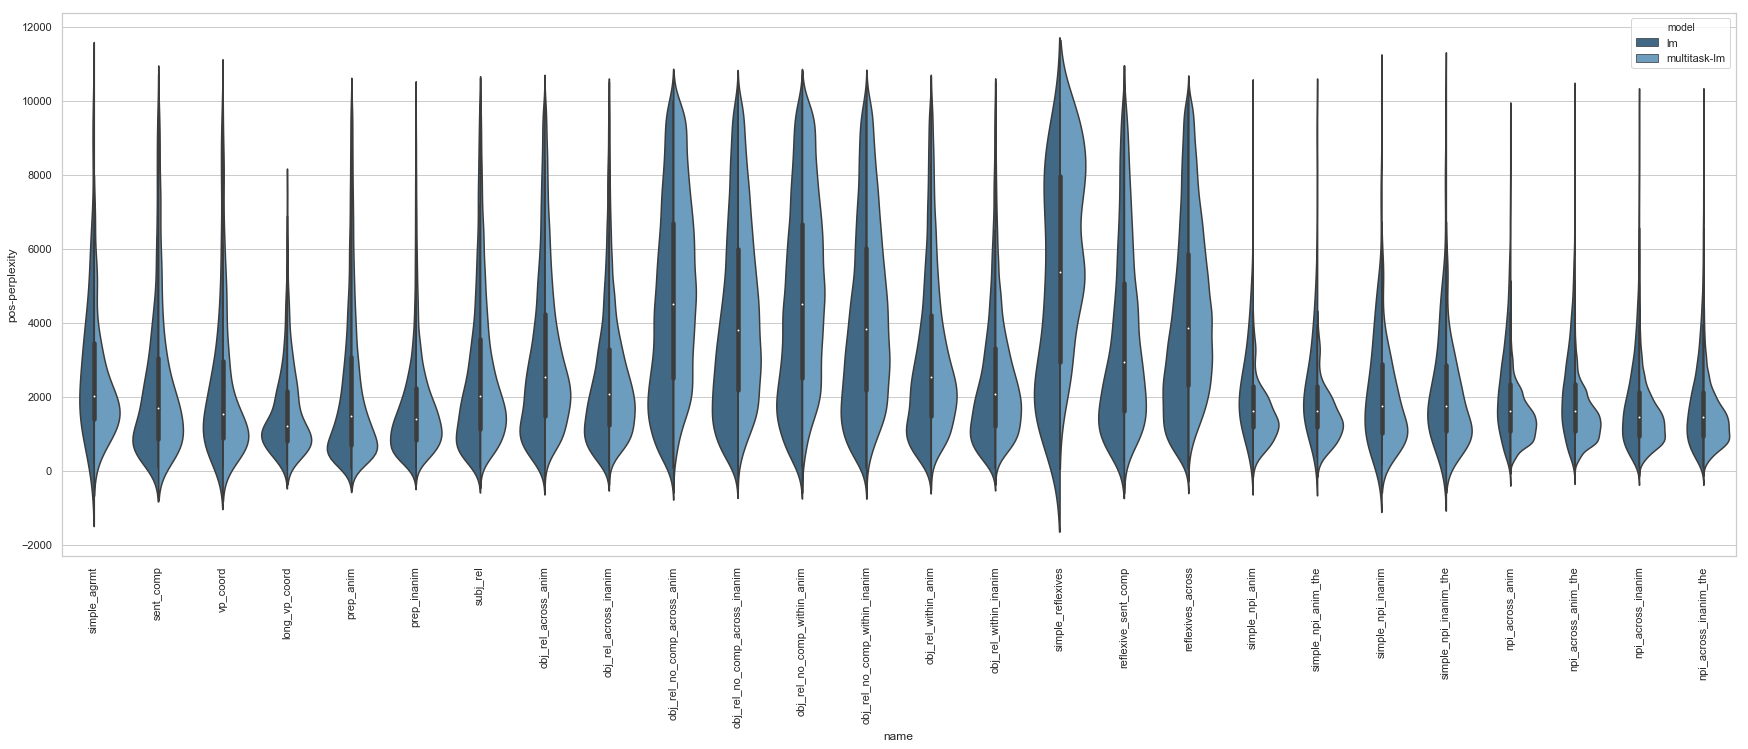

In [222]:
df_both = pd.concat([lm_df_clip, multi_df_clip])

fig, ax = plt.subplots(figsize=(30, 10))
f = sns.violinplot(
    data=df_both, x='name', y='pos-perplexity', hue='model', ax=ax, palette='Blues_d', split=True, order=ALL)
_ = plt.xticks(rotation=90)

# Effect of UNK on predictions

In [223]:
UNK = '<UNK>'

pos_unk = lm_df['pos-sentence-processed'].str.contains(UNK)
neg_unk = lm_df['neg-sentence-processed'].str.contains(UNK)
either_unk = pos_unk | neg_unk
both_unk = pos_unk & neg_unk
only_pos_unk = pos_unk & -neg_unk
only_neg_unk = -pos_unk & neg_unk

print('pos contains UNK:', round(100 * pos_unk.sum() / len(lm_df), 2))
print('neg contains UNK:', round(100 * neg_unk.sum() / len(lm_df), 2))
print('either contain UNK:', round(100 * either_unk.sum() / len(lm_df), 2))
print('both contain UNK:', round(100 * both_unk.sum() / len(lm_df), 2))
print('only pos contains UNK:', round(100 * only_pos_unk.sum() / len(lm_df), 2))
print('only neg contains UNK:', round(100 * only_neg_unk.sum() / len(lm_df), 2))

pos contains UNK: 29.44
neg contains UNK: 29.16
either contain UNK: 33.57
both contain UNK: 25.03
only pos contains UNK: 4.41
only neg contains UNK: 4.12


# Show all results

In [224]:
def filter_folders(folders, name, include=[], exclude=[]):
    filtered = []
    for folder in folders:
        folder = folder.split('_')
        if folder[0] == name:
            if all(name in folder for name in include) and all(not name in folder for name in exclude):
                filtered.append('_'.join(folder))
    if not filtered:
        filtered.append('')

    return filtered

def get_max_dev(folders):
    return '_'.join(max(
        [folder.split('_') for folder in folders], 
        key=lambda l: l[-1]))

def get_min_dev(folders):
    return '_'.join(max(
        [folder.split('_') for folder in folders], 
        key=lambda l: l[-1]))

In [225]:
model_dir = '../models'
temp_dir = 'temp'

all_folders = [d for d in os.listdir(model_dir)
    if os.path.isdir(os.path.join(model_dir, d))
    and d != temp_dir]

In [226]:
lm_folders = filter_folders(all_folders, 'lm', exclude=['vocab=small'])
lm_folders

['lm_dev=120.49',
 'lm_dev=120.75',
 'lm_dev=121.12',
 'lm_dev=121.73',
 'lm_dev=121.79',
 'lm_dev=122.0',
 'lm_dev=122.08',
 'lm_dev=122.42']

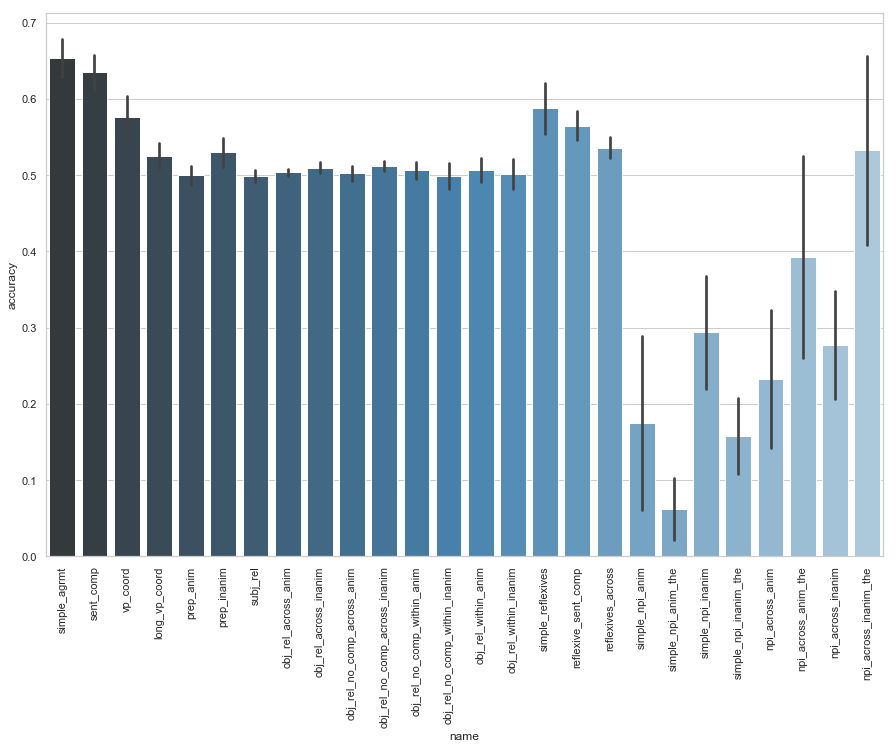

In [36]:
lm_dfs = [
    pd.read_csv(f'../models/{folder}/output/syneval_results.tsv', sep='\t') 
    for folder in lm_folders
]
lm_df = get_results_as_dataframe(lm_dfs, 'lm')

fig, ax = plt.subplots(figsize=(15, 10))
g = sns.barplot(
    data=lm_df, x='name', y='accuracy', ax=ax, palette="Blues_d", order=ALL, ci='sd')
labels = plt.xticks(rotation=90)

# Effect of capitalizing

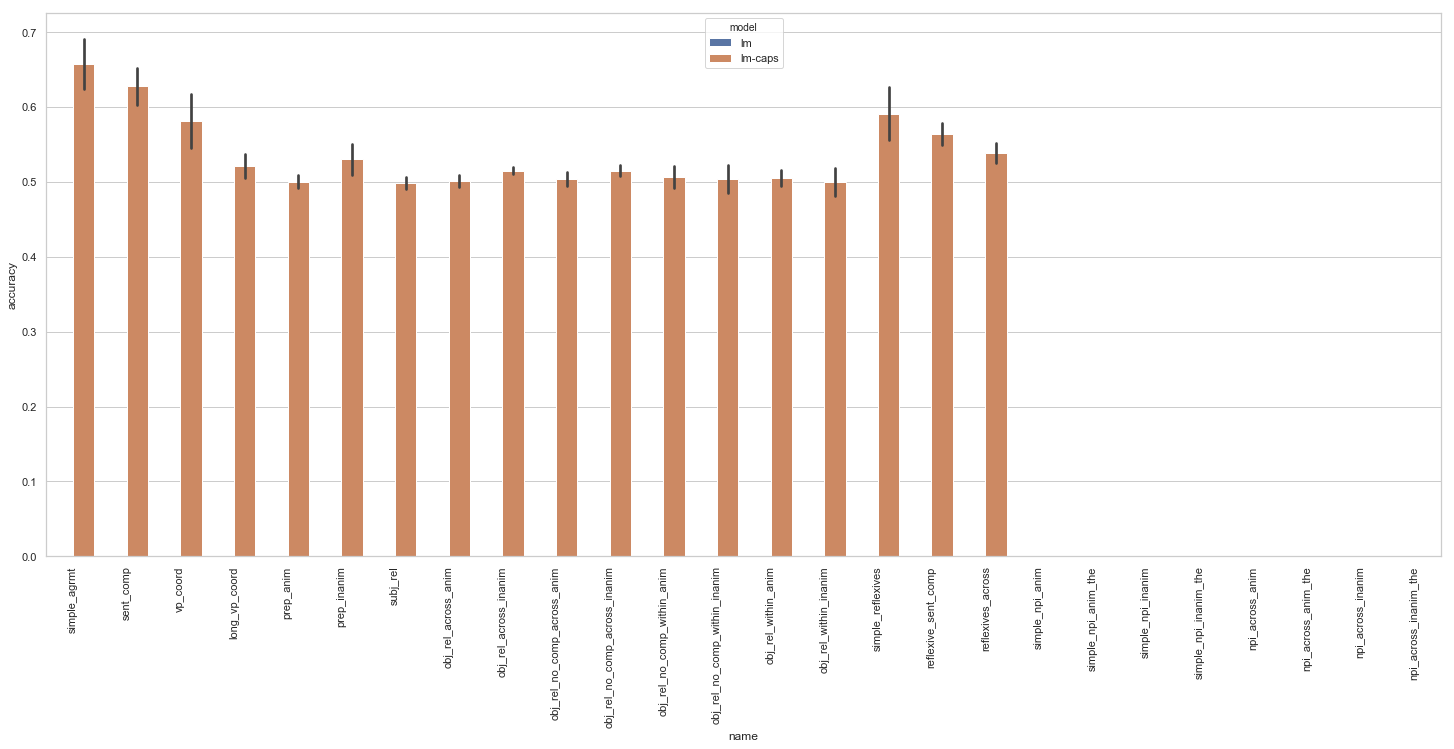

In [227]:
lm_caps_dfs = [
    pd.read_csv(f'../models/{folder}/output/syneval_results_caps.tsv', sep='\t') 
    for folder in lm_folders
]
lm_caps_df = get_results_as_dataframe(lm_caps_dfs, 'lm-caps')

lm_both = pd.concat([lm_df, lm_caps_df])

fig, ax = plt.subplots(figsize=(25, 10))
g = sns.barplot(data=lm_both, x='name', y='accuracy', hue='model', ax=ax, order=ALL, ci='sd')
labels = plt.xticks(rotation=90)

# Multitask model

## All-spans vs. Some-spans

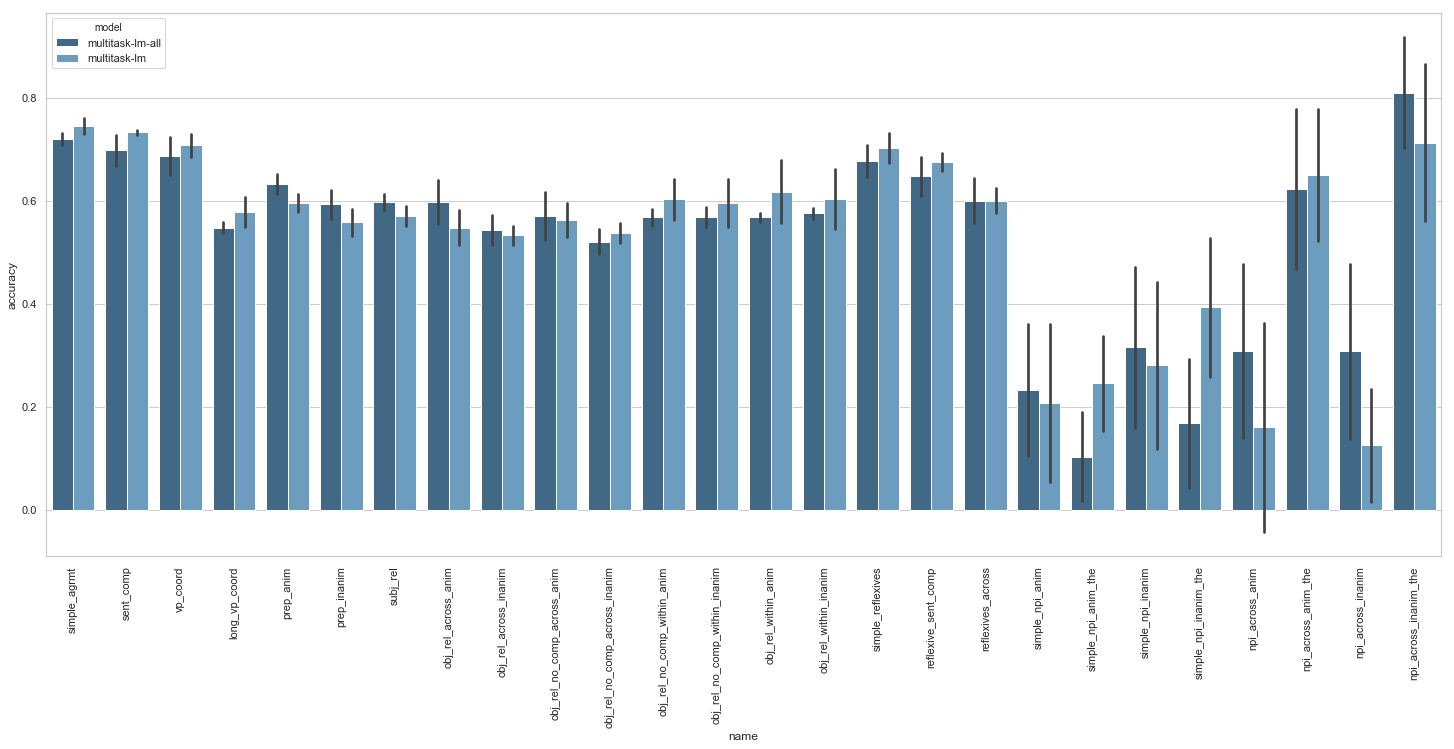

In [47]:
all_multi_dfs = [
    pd.read_csv(f'../models/{folder}/output/syneval_results.tsv', sep='\t') 
    for folder in filter_folders(all_folders, 'multitask-lm', include=['all-spans'])
]
all_multi_df = get_results_as_dataframe(all_multi_dfs, 'multitask-lm-all')


only_multi_dfs = [
    pd.read_csv(f'../models/{folder}/output/syneval_results.tsv', sep='\t') 
    for folder in filter_folders(all_folders, 'multitask-lm', exclude=['all-spans'])
]
only_multi_df = get_results_as_dataframe(only_multi_dfs, 'multitask-lm')


multi_df = pd.concat([all_multi_df, only_multi_df])

fig, ax = plt.subplots(figsize=(25, 10))
g = sns.barplot(
    data=multi_df, x='name', y='accuracy', ax=ax, palette="Blues_d", hue='model', order=ALL, ci='sd')
labels = plt.xticks(rotation=90)

In [228]:
multi_df = only_multi_df

# LM vs Multitask-LM

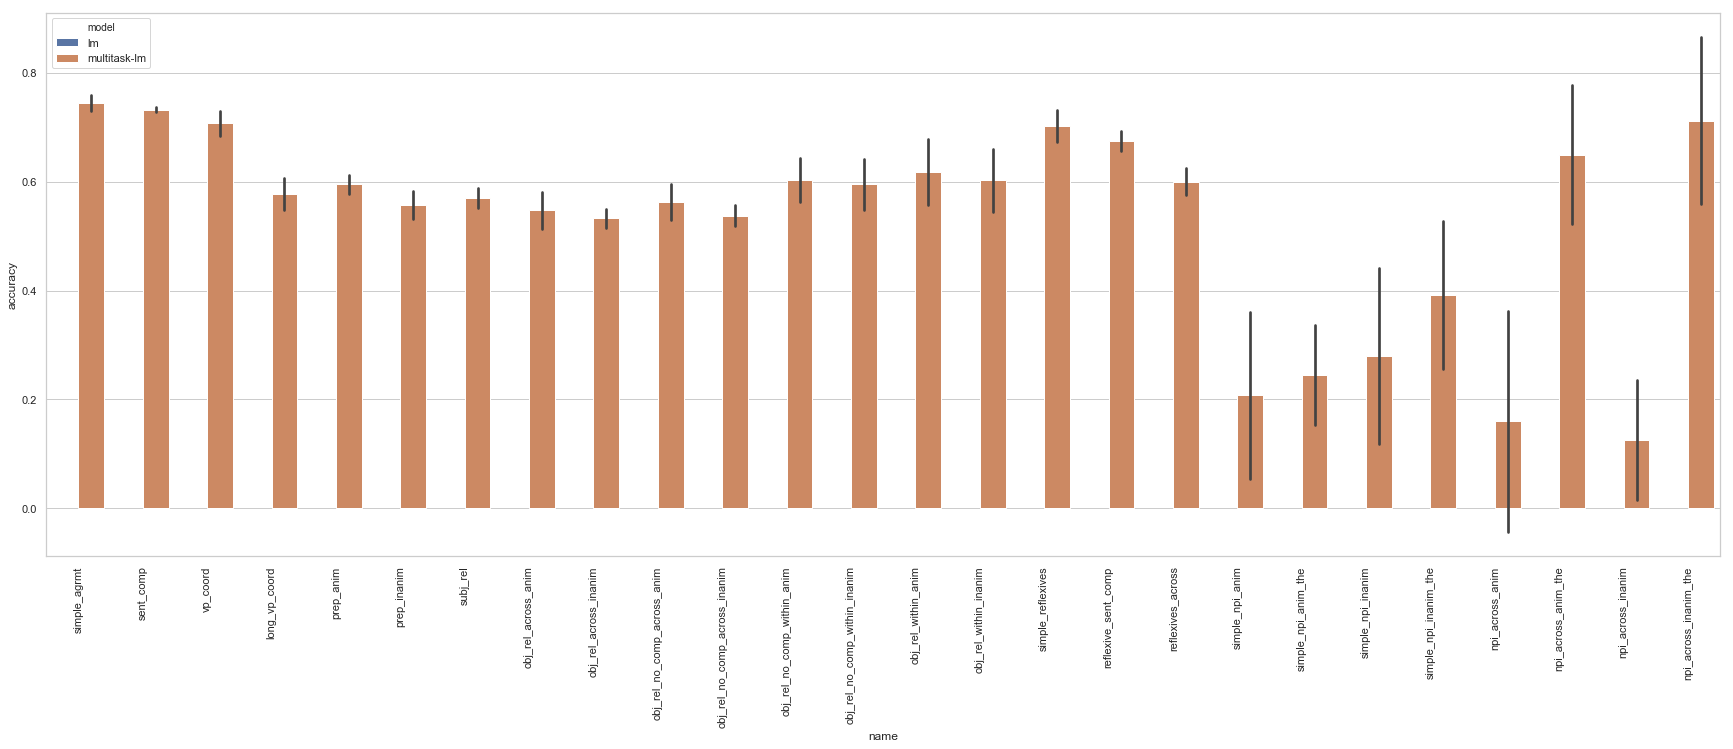

In [230]:
lm_both = pd.concat([lm_df, multi_df])

fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(
    data=lm_both, x='name', y='accuracy', hue='model', ax=ax, order=ALL, ci='sd')
labels = plt.xticks(rotation=90)

plt.savefig('figs/lm-syneval.pdf', bbox_inches='tight')

# RNNG

ValueError: Could not interpret input 'accuracy'

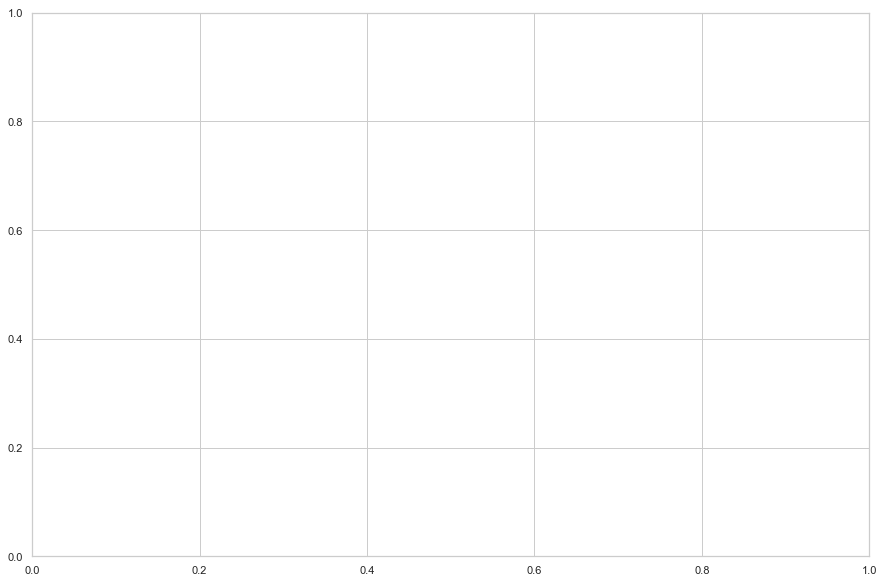

In [232]:
rnng_dfs = [
    pd.read_csv(f'../models/gen-rnng_dev=90.92/output/syneval_results_{i}.tsv', sep='\t') 
    for i in range(1, 16)
]
rnng_df = get_results_as_dataframe(rnng_dfs, 'rnng')

fig, ax = plt.subplots(figsize=(15, 10))
g = sns.barplot(
    data=lm_df, x='name', y='accuracy', ax=ax, palette="Blues_d", order=ALL, ci='sd')
labels = plt.xticks(rotation=90)

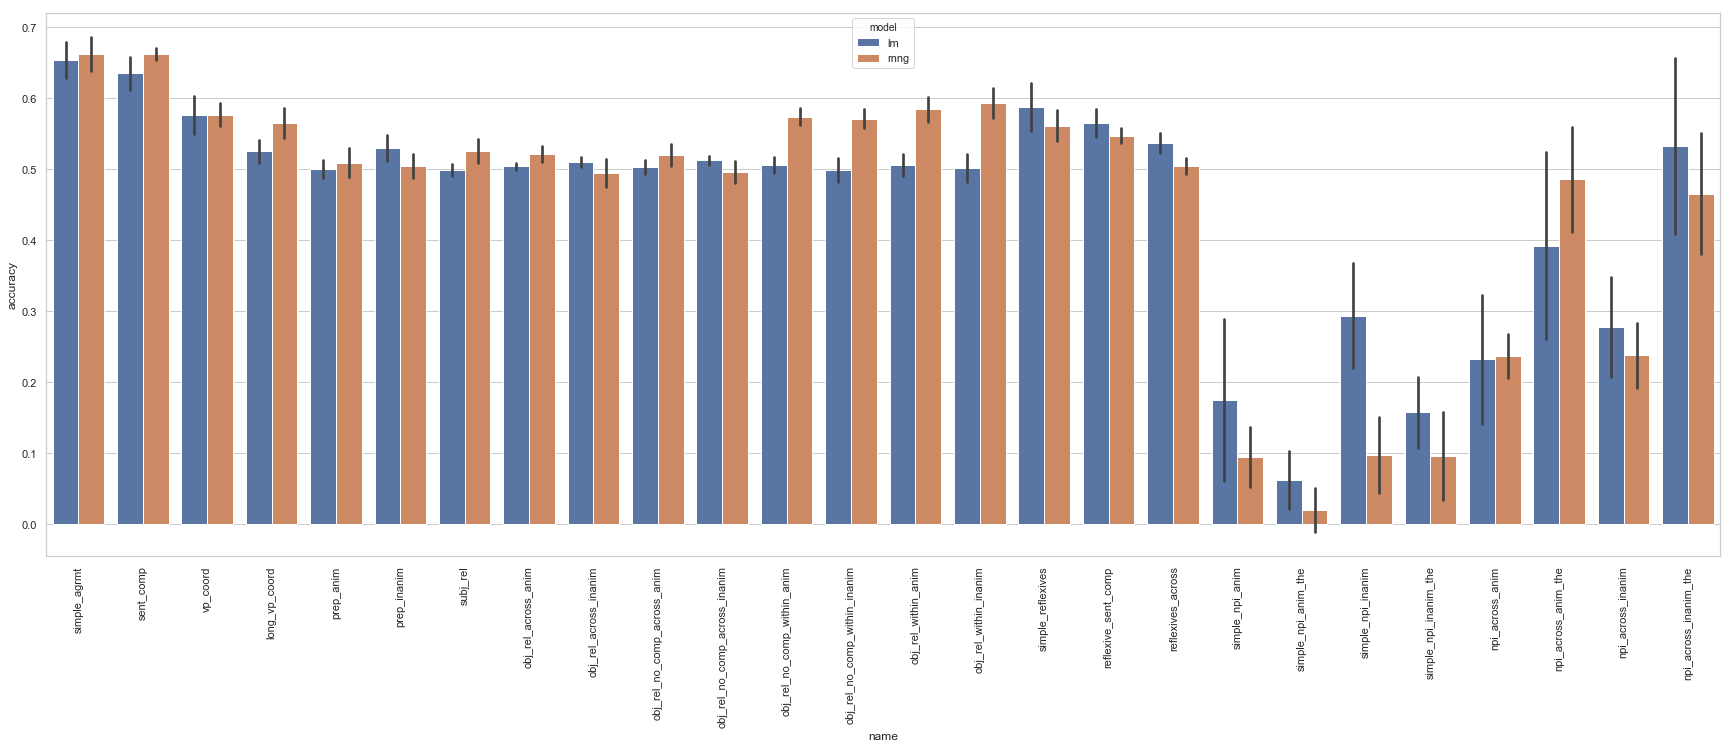

In [52]:
lm_rnng = pd.concat([lm_df, rnng_df])

fig, ax = plt.subplots(figsize=(30, 10))
g = sns.barplot(
    data=lm_rnng, x='name', y='accuracy', hue='model', ax=ax, order=ALL, ci='sd')
labels = plt.xticks(rotation=90)

plt.savefig('figs/lm-rnng-syneval.pdf', bbox_inches='tight')

# All three together

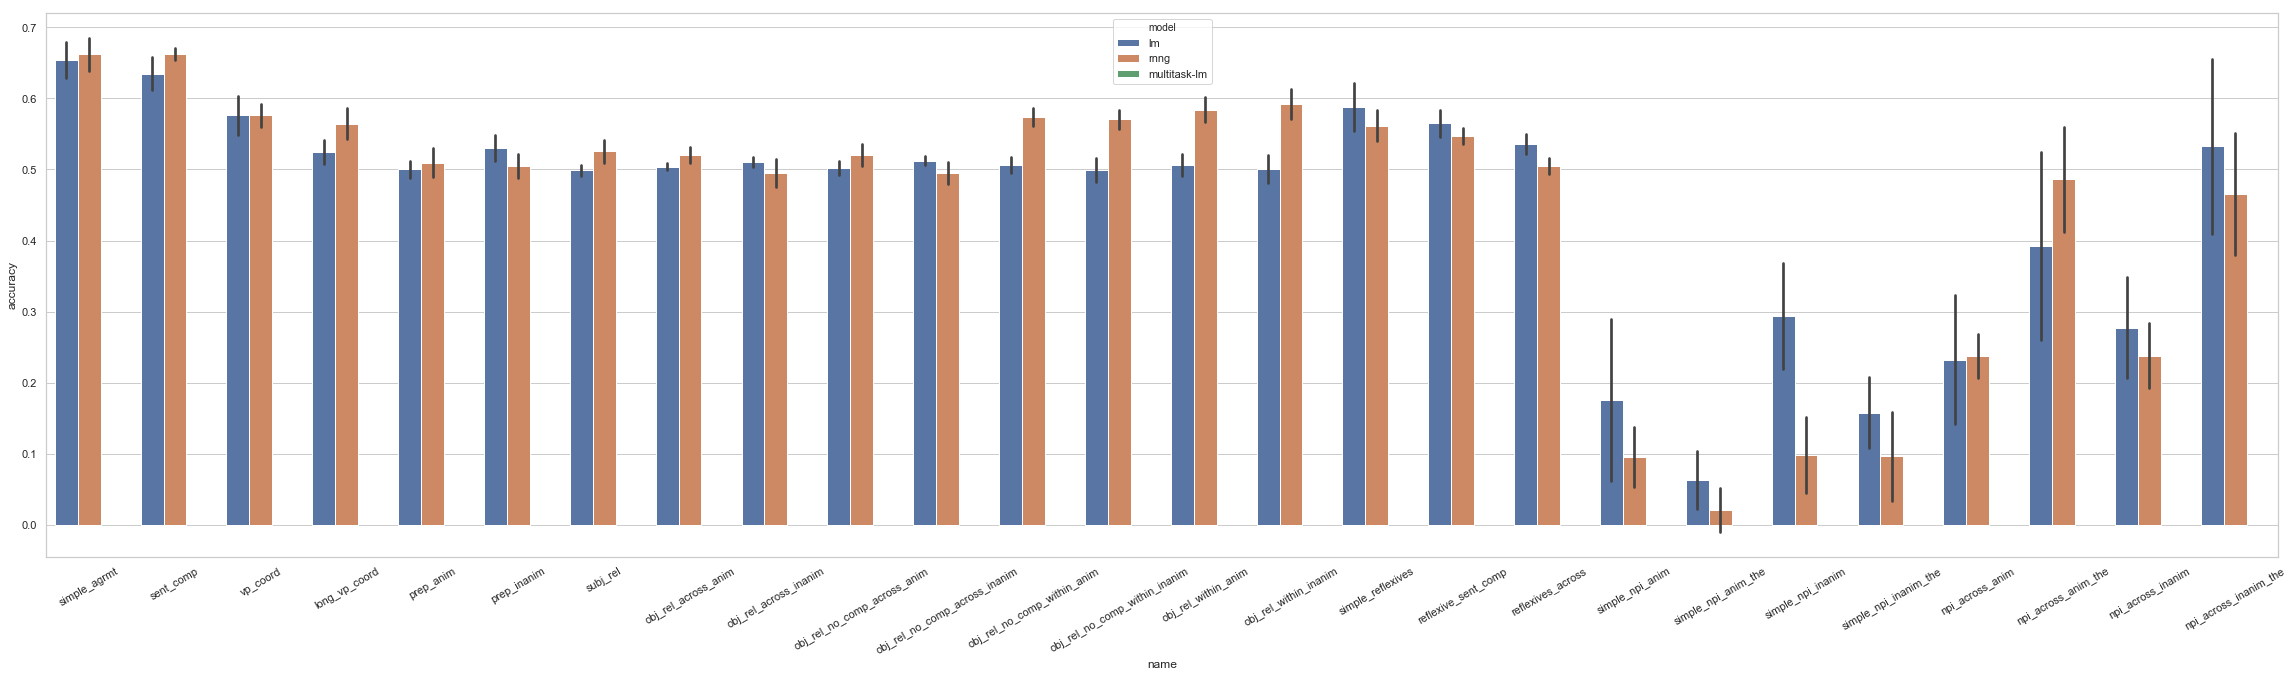

In [206]:
lm_all = pd.concat([lm_df, rnng_df, multi_df])

fig, ax = plt.subplots(figsize=(40, 10))
g = sns.barplot(
    data=lm_all, x='name', y='accuracy', hue='model', ax=ax, order=ALL, ci='sd')
labels = plt.xticks(rotation=30)

plt.savefig('figs/all-syneval.pdf', bbox_inches='tight')

# Remove pairs with UNK

In [208]:
rnng_nounk_df = get_results_as_dataframe(
    rnng_dfs, 'rnng-no-unk', exclude_unks=True)

multi_nounk_df = get_results_as_dataframe(
    only_multi_dfs, 'multitask-lm-no-unk', exclude_unks=True)

lm_nounk_df = get_results_as_dataframe(
    lm_dfs, 'lm-no-unk', exclude_unks=True)

In [ ]:
lm_all = pd.concat([lm_df, lm_nounk_df])

fig, ax = plt.subplots(figsize=(40, 10))
g = sns.barplot(
    data=lm_all, x='name', y='accuracy', hue='model', ax=ax, order=ALL, ci='sd')
labels = plt.xticks(rotation=30)

In [ ]:
lm_all = pd.concat([multi_df, multi_nounk_df])

fig, ax = plt.subplots(figsize=(40, 10))
g = sns.barplot(
    data=lm_all, x='name', y='accuracy', hue='model', ax=ax, order=ALL, ci='sd')
labels = plt.xticks(rotation=30)

In [ ]:
lm_all = pd.concat([rnng_df, rnng_nounk_df])

fig, ax = plt.subplots(figsize=(40, 10))
g = sns.barplot(
    data=lm_all, x='name', y='accuracy', hue='model', ax=ax, order=ALL, ci='sd')
labels = plt.xticks(rotation=30)

In [ ]:
lm_all = pd.concat([lm_nounk_df, rnng_nounk_df, multi_nounk_df])

fig, ax = plt.subplots(figsize=(40, 10))
g = sns.barplot(
    data=lm_all, x='name', y='accuracy', hue='model', ax=ax, order=ALL, ci='sd')
labels = plt.xticks(rotation=30)

plt.savefig('figs/all-syneval-no-unk.pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 30))
g = sns.barplot(
    data=lm_all, y='name', x='accuracy', hue='model', ax=ax, order=ALL, ci='sd')

plt.savefig('figs/all-syneval-no-unk.pdf', bbox_inches='tight')

# Compare predictions

In [ ]:
fpath ='../models/lm_dev=120.75/output/syneval_results.tsv'
lm_df = pd.read_csv(fpath, sep='\t')
lm_df['model'] = 'lm'

fpath ='../models/multitask-lm_seed=4_dev=136.3/output/syneval_results.tsv'
multi_df = pd.read_csv(fpath, sep='\t')
multi_df['model'] = 'multitask-lm'

In [ ]:
n = len(lm_df)
same = (lm_df['correct'] == multi_df['correct']).sum() / n
better = (-lm_df['correct'] == multi_df['correct']).sum() / n

print(same)
print(better)

In [ ]:
lm_df['difference'] = lm_df['neg-perplexity'] - lm_df['pos-perplexity']

In [ ]:
sorted_lm_df = lm_df.sort_values(by='difference', ascending=False)

In [ ]:
select(sorted_lm_df, 'vp_coord')

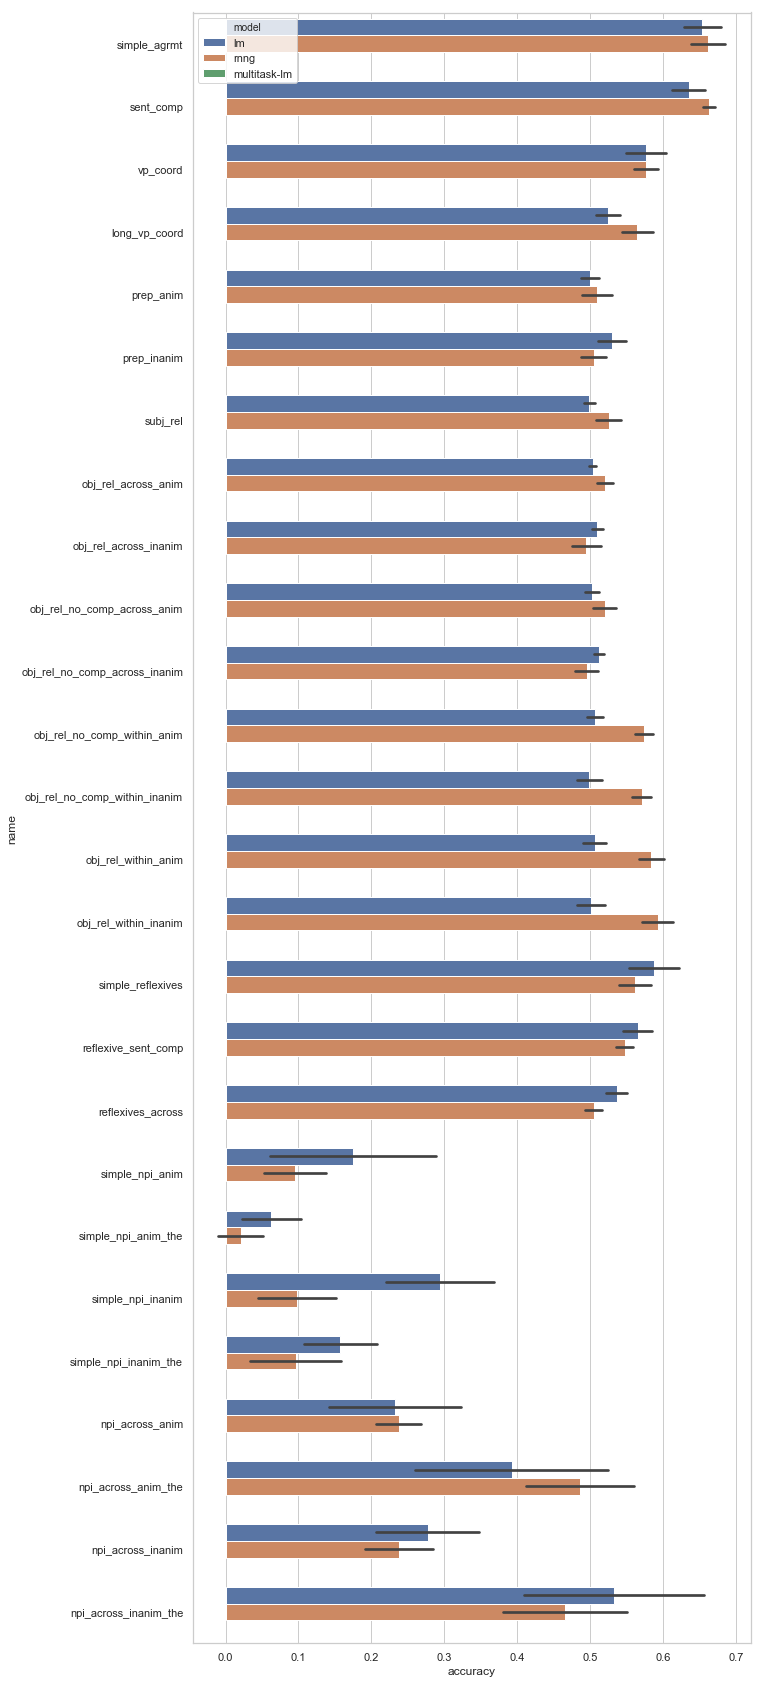

In [209]:
fig, ax = plt.subplots(figsize=(10, 30))
g = sns.barplot(
    data=lm_all, y='name', x='accuracy', hue='model', ax=ax, order=ALL, ci='sd')

plt.savefig('figs/all-syneval-no-unk.pdf', bbox_inches='tight')